

```
importing relevent libraries
```




In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import datetime
import bert
import yfinance as yf
import pandas as pd
import tensorflow
import sklearn



```
using yfinance to download financial data
```



In [2]:
df = yf.download('AMZN',start='2013-10-10',end='2021-10-11')


[*********************100%***********************]  1 of 1 completed


In [3]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-10-10,15.231500,15.335000,15.129500,15.258500,15.258500,51102000
2013-10-11,15.238500,15.546500,15.192000,15.544500,15.544500,43262000
2013-10-14,15.461000,15.582500,15.350000,15.535000,15.535000,38782000
2013-10-15,15.493500,15.539500,15.263000,15.320000,15.320000,45222000
2013-10-16,15.419000,15.540000,15.277500,15.524500,15.524500,43414000
...,...,...,...,...,...,...
2021-10-04,163.969498,163.999496,158.812500,159.488998,159.488998,90462000
2021-10-05,160.225006,163.036499,160.123001,161.050003,161.050003,65384000
2021-10-06,160.676498,163.216995,159.931000,163.100494,163.100494,50660000




```
remiving all coloumns except of the adj close and then renaming it to close



In [4]:
df.drop(df.columns[[0,1,2,3,5]], axis=1, inplace=True)
df.rename(columns = {'Adj Close':'close'}, inplace = True)
df

,close
Date,
2013-10-10,15.258500
2013-10-11,15.544500
2013-10-14,15.535000
2013-10-15,15.320000
2013-10-16,15.524500
...,...
2021-10-04,159.488998
2021-10-05,161.050003
2021-10-06,163.100494


In [5]:
df.reset_index(inplace=True)
# df.reset_index(inplace=True)
df

,Date,close
0,2013-10-10,15.258500
1,2013-10-11,15.544500
2,2013-10-14,15.535000
3,2013-10-15,15.320000
4,2013-10-16,15.524500
...,...,...
2009,2021-10-04,159.488998
2010,2021-10-05,161.050003
2011,2021-10-06,163.100494
2012,2021-10-07,165.121506




```
splitting the data into train and validation set
```



In [6]:
length_data = len(df)     # rows that data has
split_ratio = 0.7         # %70 train + %30 validation
length_train = round(length_data * split_ratio)  
length_validation = length_data - length_train
print("Data length :", length_data)
print("Train data length :", length_train)
print("Validation data lenth :", length_validation)

Data length : 2014
Train data length : 1410
Validation data lenth : 604


In [7]:
train_data = df[:length_train]
train_data['Date'] = pd.to_datetime(train_data['Date'])  # converting to date time object
train_data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Date,close
0,2013-10-10,15.258500
1,2013-10-11,15.544500
2,2013-10-14,15.535000
3,2013-10-15,15.320000
4,2013-10-16,15.524500
...,...,...
1405,2019-05-13,91.134003
1406,2019-05-14,92.005997
1407,2019-05-15,93.557503
1408,2019-05-16,95.378502


In [8]:
validation_data = df[length_train:] 
validation_data['Date'] = pd.to_datetime(validation_data['Date'])  # converting to date time object
validation_data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Date,close
1410,2019-05-20,92.948502
1411,2019-05-21,92.875999
1412,2019-05-22,92.984001
1413,2019-05-23,90.774002
1414,2019-05-24,91.164001
...,...,...
2009,2021-10-04,159.488998
2010,2021-10-05,161.050003
2011,2021-10-06,163.100494
2012,2021-10-07,165.121506


In [9]:
dataset_train = train_data.close.values
dataset_train.shape
# dataset_train

(1410,)

In [10]:
dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape
# dataset_train

(1410, 1)



```
using minmaxscaler to normalize the data before feeding it to the model
```



In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))


# scaling dataset
dataset_train_scaled = scaler.fit_transform(dataset_train)

dataset_train_scaled.shape
# dataset_train_scaled

(1410, 1)

In [12]:
dataset_train_scaled

array([[0.01039622],
       [0.01366002],
       [0.0135516 ],
       ...,
       [0.90393483],
       [0.92471584],
       [0.90270798]])



```
plotting the data
```



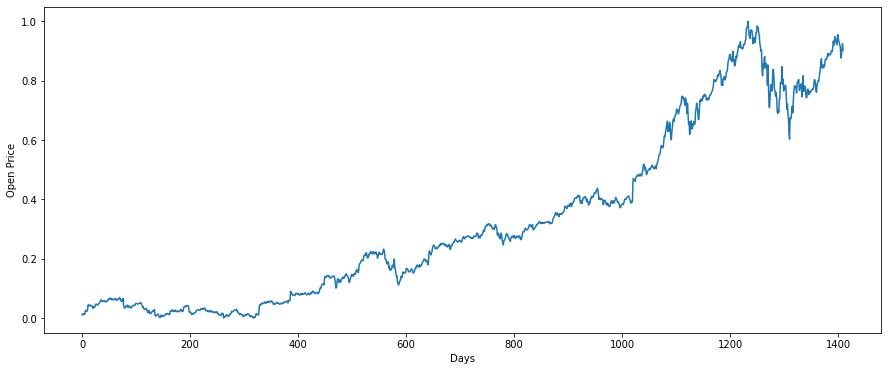

In [13]:
plt.subplots(figsize = (15,6))
plt.plot(dataset_train_scaled)
plt.xlabel("Days")
plt.ylabel("Open Price")
plt.show()



```
making windowed data of previous of 50 days for feeeding into the model
```



In [14]:
X_train = []
y_train = []

time_step = 50

for i in range(time_step, length_train):
    X_train.append(dataset_train_scaled[i-time_step:i,0])
    y_train.append(dataset_train_scaled[i,0])
    
# converting list to array for ease of working
X_train, y_train = np.array(X_train), np.array(y_train)



```
reshaping data in order to feed it to the model
```



In [15]:
print("Shape of X_train before reshape :",X_train.shape)
print("Shape of y_train before reshape :",y_train.shape)

Shape of X_train before reshape : (1360, 50)
Shape of y_train before reshape : (1360,)


In [16]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))

print("Shape of X_train after reshape :",X_train.shape)
print("Shape of y_train after reshape :",y_train.shape)

Shape of X_train after reshape : (1360, 50, 1)
Shape of y_train after reshape : (1360, 1)




```
checking the state of our datapoints i.e 50 datapoints for predicting the price of a particular date

```



In [17]:
X_train[0]

array([[0.01039622],
       [0.01366002],
       [0.0135516 ],
       [0.01109805],
       [0.01343178],
       [0.01359155],
       [0.02395354],
       [0.02253276],
       [0.02601339],
       [0.02271534],
       [0.02582508],
       [0.0436162 ],
       [0.040632  ],
       [0.04322249],
       [0.04229813],
       [0.04398138],
       [0.0411113 ],
       [0.04096294],
       [0.04104852],
       [0.03950221],
       [0.03230131],
       [0.03615282],
       [0.03847514],
       [0.03570776],
       [0.03952505],
       [0.04590429],
       [0.04691423],
       [0.04520815],
       [0.04450061],
       [0.04314831],
       [0.04677157],
       [0.04870589],
       [0.05117657],
       [0.05387548],
       [0.05692245],
       [0.06086525],
       [0.06011206],
       [0.05575273],
       [0.0564945 ],
       [0.05565573],
       [0.05705939],
       [0.05588396],
       [0.05753298],
       [0.05434337],
       [0.053807  ],
       [0.05551308],
       [0.05821198],
       [0.057

In [18]:
y_train[0]

array([0.06576095])



```
making a rnn based model:
Here I have used the function method of defning the model
I have also included droputs in order to orevent overfitting of the training data
```



In [19]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

# initializing the RNN
regressor = Sequential()

# adding first RNN layer and dropout regulatization
regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True, 
              input_shape = (X_train.shape[1],1))
             )

regressor.add(
    Dropout(0.2)
             )


# adding second RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# adding third RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# adding fourth RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50)
             )

regressor.add(
    Dropout(0.2)
             )

# adding the output layer
regressor.add(Dense(units = 1))

# compiling RNN
regressor.compile(
    optimizer = "adam", 
    loss = "mean_squared_error",
    metrics = ["accuracy"])

# fitting the RNN
history = regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
43/43 [==============================] - 9s 98ms/step - loss: 0.2907 - accuracy: 0.0015
Epoch 2/50
43/43 [==============================] - 5s 115ms/step - loss: 0.1664 - accuracy: 0.0015
Epoch 3/50
43/43 [==============================] - 5s 111ms/step - loss: 0.1278 - accuracy: 7.3529e-04
Epoch 4/50
43/43 [==============================] - 5s 110ms/step - loss: 0.0848 - accuracy: 7.3529e-04
Epoch 5/50
43/43 [==============================] - 3s 74ms/step - loss: 0.0662 - accuracy: 0.0015
Epoch 6/50
43/43 [==============================] - 2s 49ms/step - loss: 0.0458 - accuracy: 7.3529e-04
Epoch 7/50
43/43 [==============================] - 2s 50ms/step - loss: 0.0385 - accuracy: 0.0015
Epoch 8/50
43/43 [==============================] - 2s 50ms/step - loss: 0.0339 - accuracy: 0.0015
Epoch 9/50
43/43 [==============================] - 2s 51ms/step - loss: 0.0280 - accuracy: 0.0015
Epoch 10/50
43/43 [==============================] - 2s 50ms/step - loss: 0.0252 - accuracy: 0

In [20]:
history.history["loss"]

[0.29073819518089294,
 0.16638775169849396,
 0.12783941626548767,
 0.08475759625434875,
 0.06621310859918594,
 0.045774299651384354,
 0.038463812321424484,
 0.033915162086486816,
 0.028035491704940796,
 0.025249166414141655,
 0.022454481571912766,
 0.018173662945628166,
 0.0161440372467041,
 0.01559077575802803,
 0.013769473880529404,
 0.01372789591550827,
 0.012057747691869736,
 0.011324003338813782,
 0.009887656196951866,
 0.009171177633106709,
 0.009482881985604763,
 0.008261602371931076,
 0.007999276742339134,
 0.007938534952700138,
 0.00749610923230648,
 0.007201548665761948,
 0.0072189816273748875,
 0.005992643069475889,
 0.0057626389898359776,
 0.0054693943820893764,
 0.005295690149068832,
 0.0054235695861279964,
 0.005232564639300108,
 0.00510671641677618,
 0.004961281083524227,
 0.004914579447358847,
 0.004299720749258995,
 0.004156776238232851,
 0.003884275909513235,
 0.0037645602133125067,
 0.004032465163618326,
 0.003392784623429179,
 0.0036967319902032614,
 0.0033542311284



```
Using 50 epochs seems to be the best decision
```



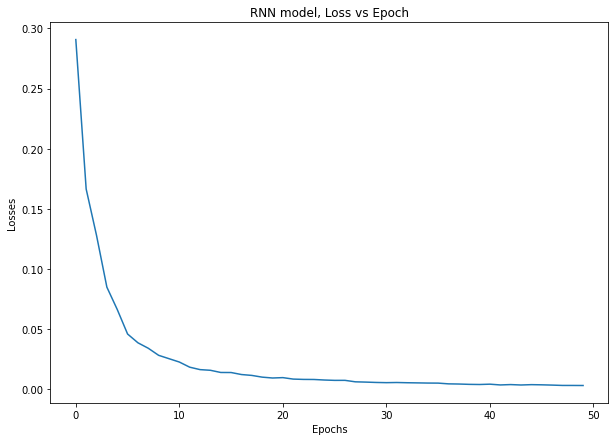

In [21]:
# Plotting Loss vs Epochs
plt.figure(figsize =(10,7))
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("RNN model, Loss vs Epoch")
plt.show()

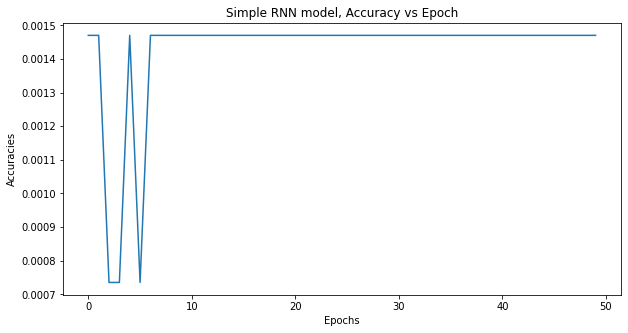

In [22]:
# Plotting Accuracy vs Epochs
plt.figure(figsize =(10,5))
plt.plot(history.history["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracies")
plt.title("Simple RNN model, Accuracy vs Epoch")
plt.show()

In [23]:
y_pred = regressor.predict(X_train)  # predictions
y_pred = scaler.inverse_transform(y_pred) # scaling back from 0-1 to original
y_pred.shape


43/43 [==============================] - 1s 14ms/step


(1360, 1)

In [24]:
y_train = scaler.inverse_transform(y_train) # scaling back from 0-1 to original
y_train.shape

(1360, 1)

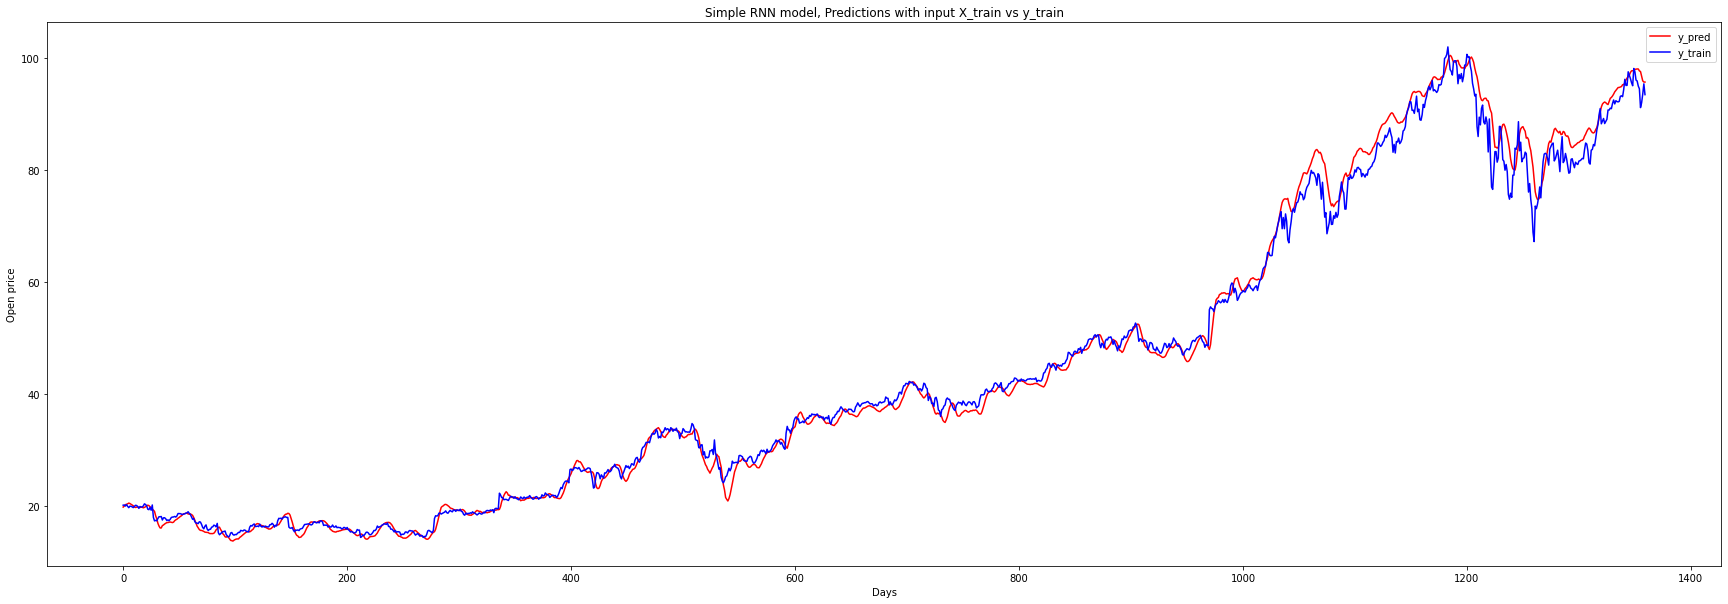

In [25]:
plt.figure(figsize = (30,10))
plt.plot(y_pred, color = "r", label = "y_pred" )
plt.plot(y_train, color = "b", label = "y_train")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Predictions with input X_train vs y_train")
plt.legend()
plt.show()

In [26]:
dataset_validation = validation_data.close.values  # getting "open" column and converting to array
dataset_validation = np.reshape(dataset_validation, (-1,1))  # converting 1D to 2D array
scaled_dataset_validation =  scaler.fit_transform(dataset_validation)  # scaling open values to between 0 and 1
print("Shape of scaled validation dataset :",scaled_dataset_validation.shape)

Shape of scaled validation dataset : (604, 1)


In [27]:
# Creating X_test and y_test
X_test = []
y_test = []

for i in range(time_step, length_validation):
    X_test.append(scaled_dataset_validation[i-time_step:i,0])
    y_test.append(scaled_dataset_validation[i,0])

In [28]:
X_test, y_test = np.array(X_test), np.array(y_test)

In [29]:
print("Shape of X_test before reshape :",X_test.shape)
print("Shape of y_test before reshape :",y_test.shape)

Shape of X_test before reshape : (554, 50)
Shape of y_test before reshape : (554,)


In [30]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))  # reshape to 3D array
y_test = np.reshape(y_test, (-1,1))  # reshape to 2D array

In [31]:
print("Shape of X_test after reshape :",X_test.shape)
print("Shape of y_test after reshape :",y_test.shape)

Shape of X_test after reshape : (554, 50, 1)
Shape of y_test after reshape : (554, 1)


In [32]:
y_pred_of_test = regressor.predict(X_test)
# scaling back from 0-1 to original
y_pred_of_test = scaler.inverse_transform(y_pred_of_test) 
print("Shape of y_pred_of_test :",y_pred_of_test.shape)

18/18 [==============================] - 0s 15ms/step
Shape of y_pred_of_test : (554, 1)


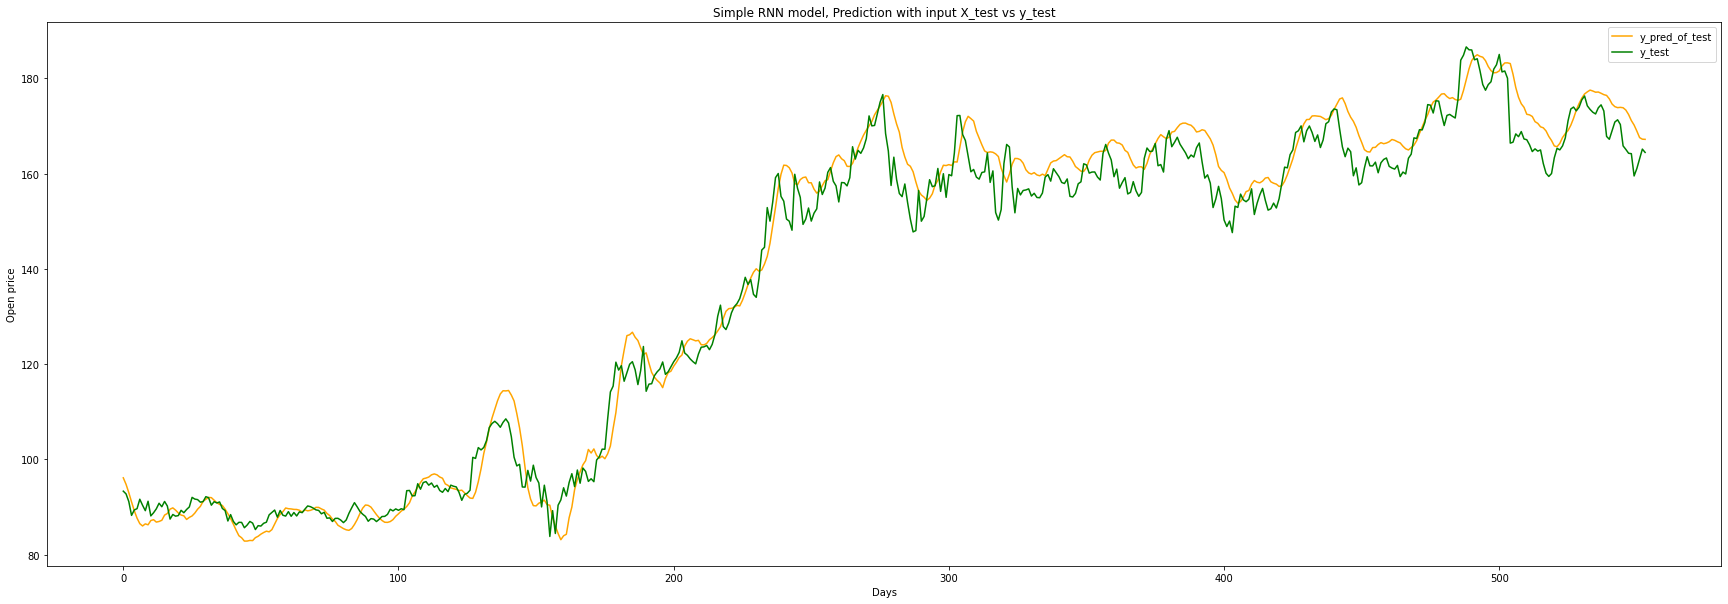

In [33]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred_of_test, label = "y_pred_of_test", c = "orange")
plt.plot(scaler.inverse_transform(y_test), label = "y_test", c = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Prediction with input X_test vs y_test")
plt.legend()
plt.show()



```
combined view of model's performance on train and validation split
```



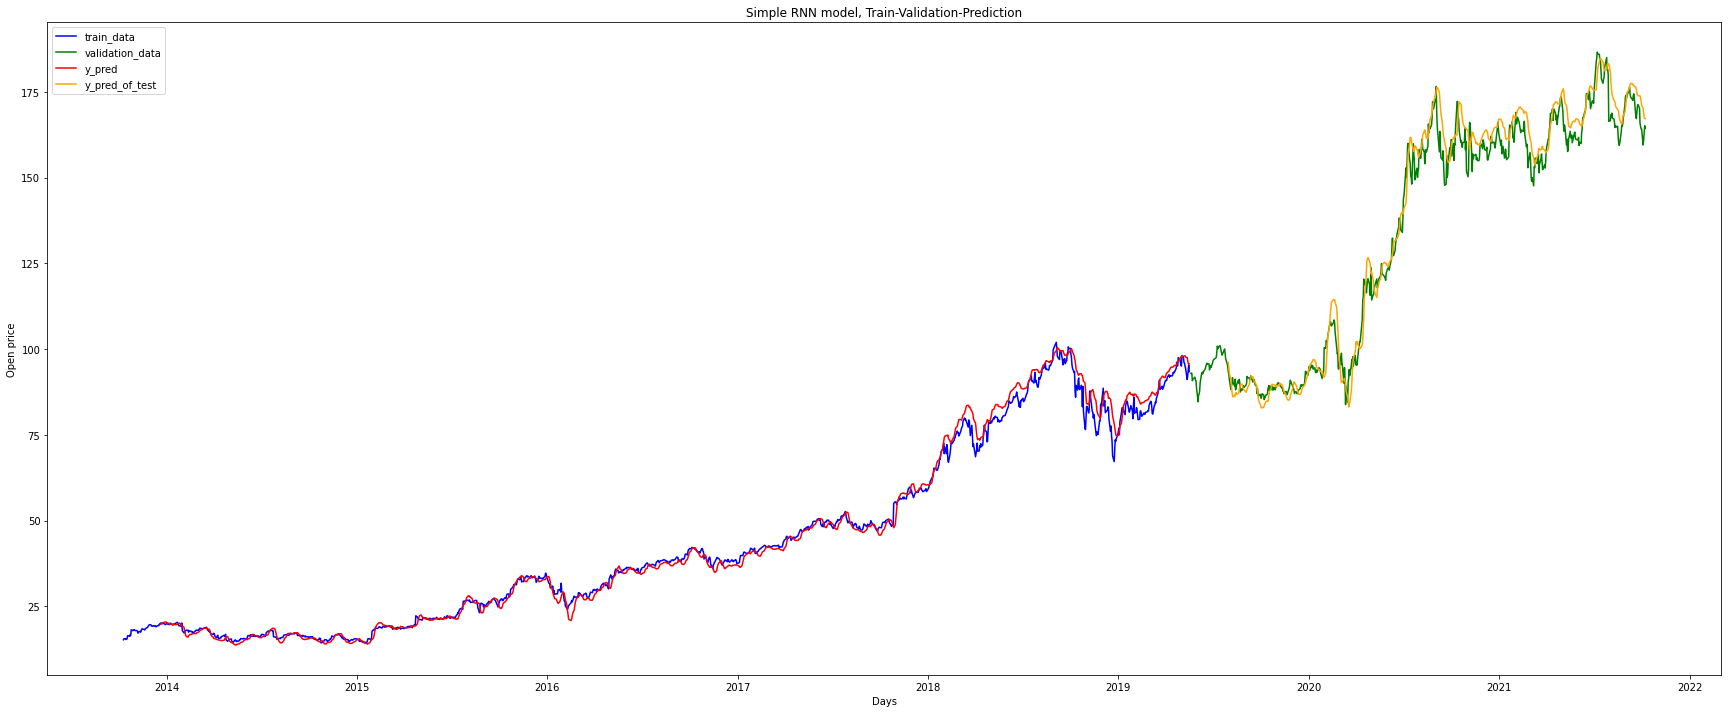

In [34]:
plt.subplots(figsize =(30,12))
plt.plot(train_data.Date, train_data.close, label = "train_data", color = "b")
plt.plot(validation_data.Date, validation_data.close, label = "validation_data", color = "g")
plt.plot(train_data.Date.iloc[time_step:], y_pred, label = "y_pred", color = "r")
plt.plot(validation_data.Date.iloc[time_step:], y_pred_of_test, label = "y_pred_of_test", color = "orange")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Train-Validation-Prediction")
plt.legend()
plt.show()



```
defining a function to compute the MAE and MSE
```



In [35]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

def compute_metrics(true_series, forecast):
  mse = mean_squared_error(true_series, forecast)
  mae = mean_absolute_error(true_series, forecast)
  return mse , mae 
  

In [36]:
mse ,mae=compute_metrics(scaler.inverse_transform(y_test), y_pred_of_test)
print(f"mse: {mse:.2f}, mae: {mae:.2f} for forecast")

mse: 25.32, mae: 3.89 for forecast




```
mow making a model with lstms 
```



In [37]:
y_train = scaler.fit_transform(y_train)

In [38]:
from keras.layers import LSTM
model_lstm = Sequential()
model_lstm.add(
    LSTM(64,return_sequences=True,input_shape = (X_train.shape[1],1))) #64 lstm neuron block
model_lstm.add(
    LSTM(64, return_sequences= False))
model_lstm.add(Dense(32))
model_lstm.add(Dense(1))
model_lstm.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["accuracy"])
history2 = model_lstm.fit(X_train, y_train, epochs = 10, batch_size = 10)

Epoch 1/10
136/136 [==============================] - 8s 36ms/step - loss: 0.0056 - accuracy: 0.0015
Epoch 2/10
136/136 [==============================] - 5s 36ms/step - loss: 9.3457e-04 - accuracy: 0.0015
Epoch 3/10
136/136 [==============================] - 5s 36ms/step - loss: 6.1039e-04 - accuracy: 0.0015
Epoch 4/10
136/136 [==============================] - 5s 36ms/step - loss: 6.7555e-04 - accuracy: 0.0015
Epoch 5/10
136/136 [==============================] - 5s 36ms/step - loss: 6.0464e-04 - accuracy: 0.0015
Epoch 6/10
136/136 [==============================] - 5s 36ms/step - loss: 5.5171e-04 - accuracy: 0.0015
Epoch 7/10
136/136 [==============================] - 5s 36ms/step - loss: 4.8162e-04 - accuracy: 0.0015
Epoch 8/10
136/136 [==============================] - 5s 36ms/step - loss: 5.1313e-04 - accuracy: 0.0015
Epoch 9/10
136/136 [==============================] - 5s 36ms/step - loss: 4.3233e-04 - accuracy: 0.0015
Epoch 10/10
136/136 [==============================] - 5s 3

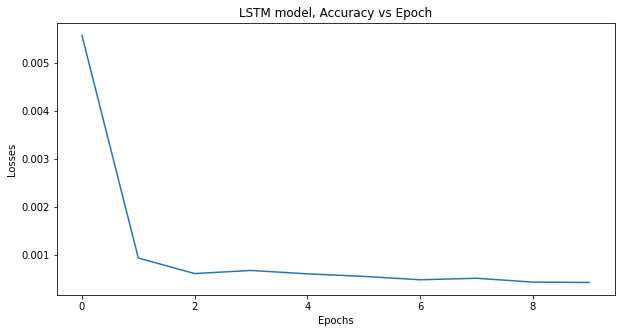

In [39]:
plt.figure(figsize =(10,5))
plt.plot(history2.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("LSTM model, Accuracy vs Epoch")
plt.show()

18/18 [==============================] - 1s 18ms/step


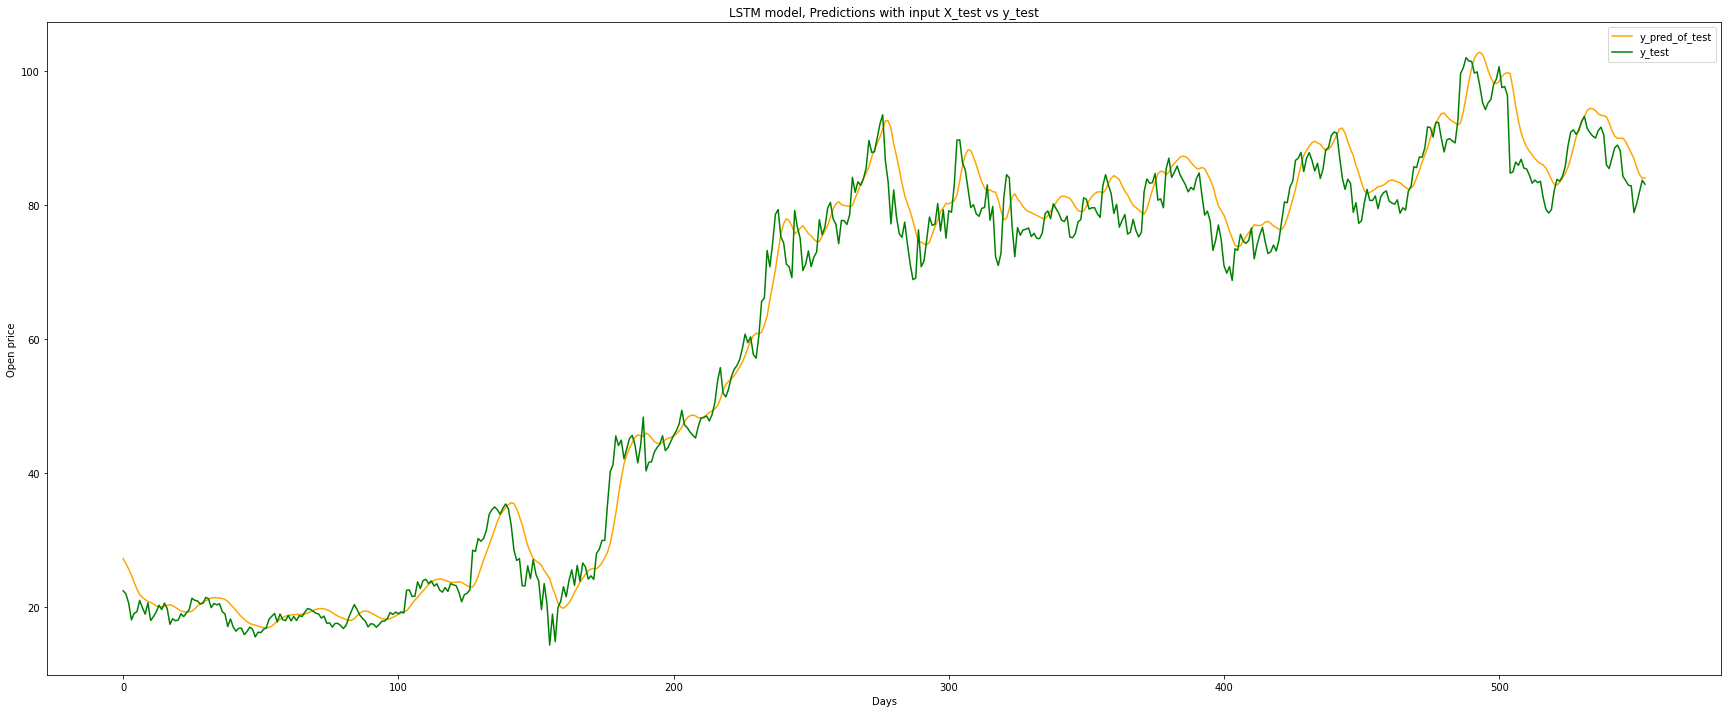

In [40]:
plt.subplots(figsize =(30,12))
plt.plot(scaler.inverse_transform(model_lstm.predict(X_test)), label = "y_pred_of_test", c = "orange" )
plt.plot(scaler.inverse_transform(y_test), label = "y_test", color = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("LSTM model, Predictions with input X_test vs y_test")
plt.legend()
plt.show()

In [41]:
mse ,mae=compute_metrics(scaler.inverse_transform(model_lstm.predict(X_test)),scaler.inverse_transform(y_test))
print(f"mse: {mse:.2f}, mae: {mae:.2f} for forecast")

18/18 [==============================] - 0s 17ms/step
mse: 14.42, mae: 2.87 for forecast
